In [87]:
from pathlib import Path
from functional import seq
from collections import defaultdict
import ipywidgets as widgets
import numpy as np
import cv2
import imageio

In [71]:
SHAPENET_DIR= Path('/datasets/users/kkania/shapenet/ShapeNetCore.v2/')

In [72]:
has_screenshot = []
models_in_total = []

for synset in SHAPENET_DIR.glob('*'):
    if synset.is_dir():
        for model in synset.glob('*'):
            if any('screenshots' in f.name for f in model.glob('*')):
                has_screenshot.append(model)
            models_in_total.append(model)

In [73]:
len(has_screenshot), len(models_in_total)

(1339, 56556)

1


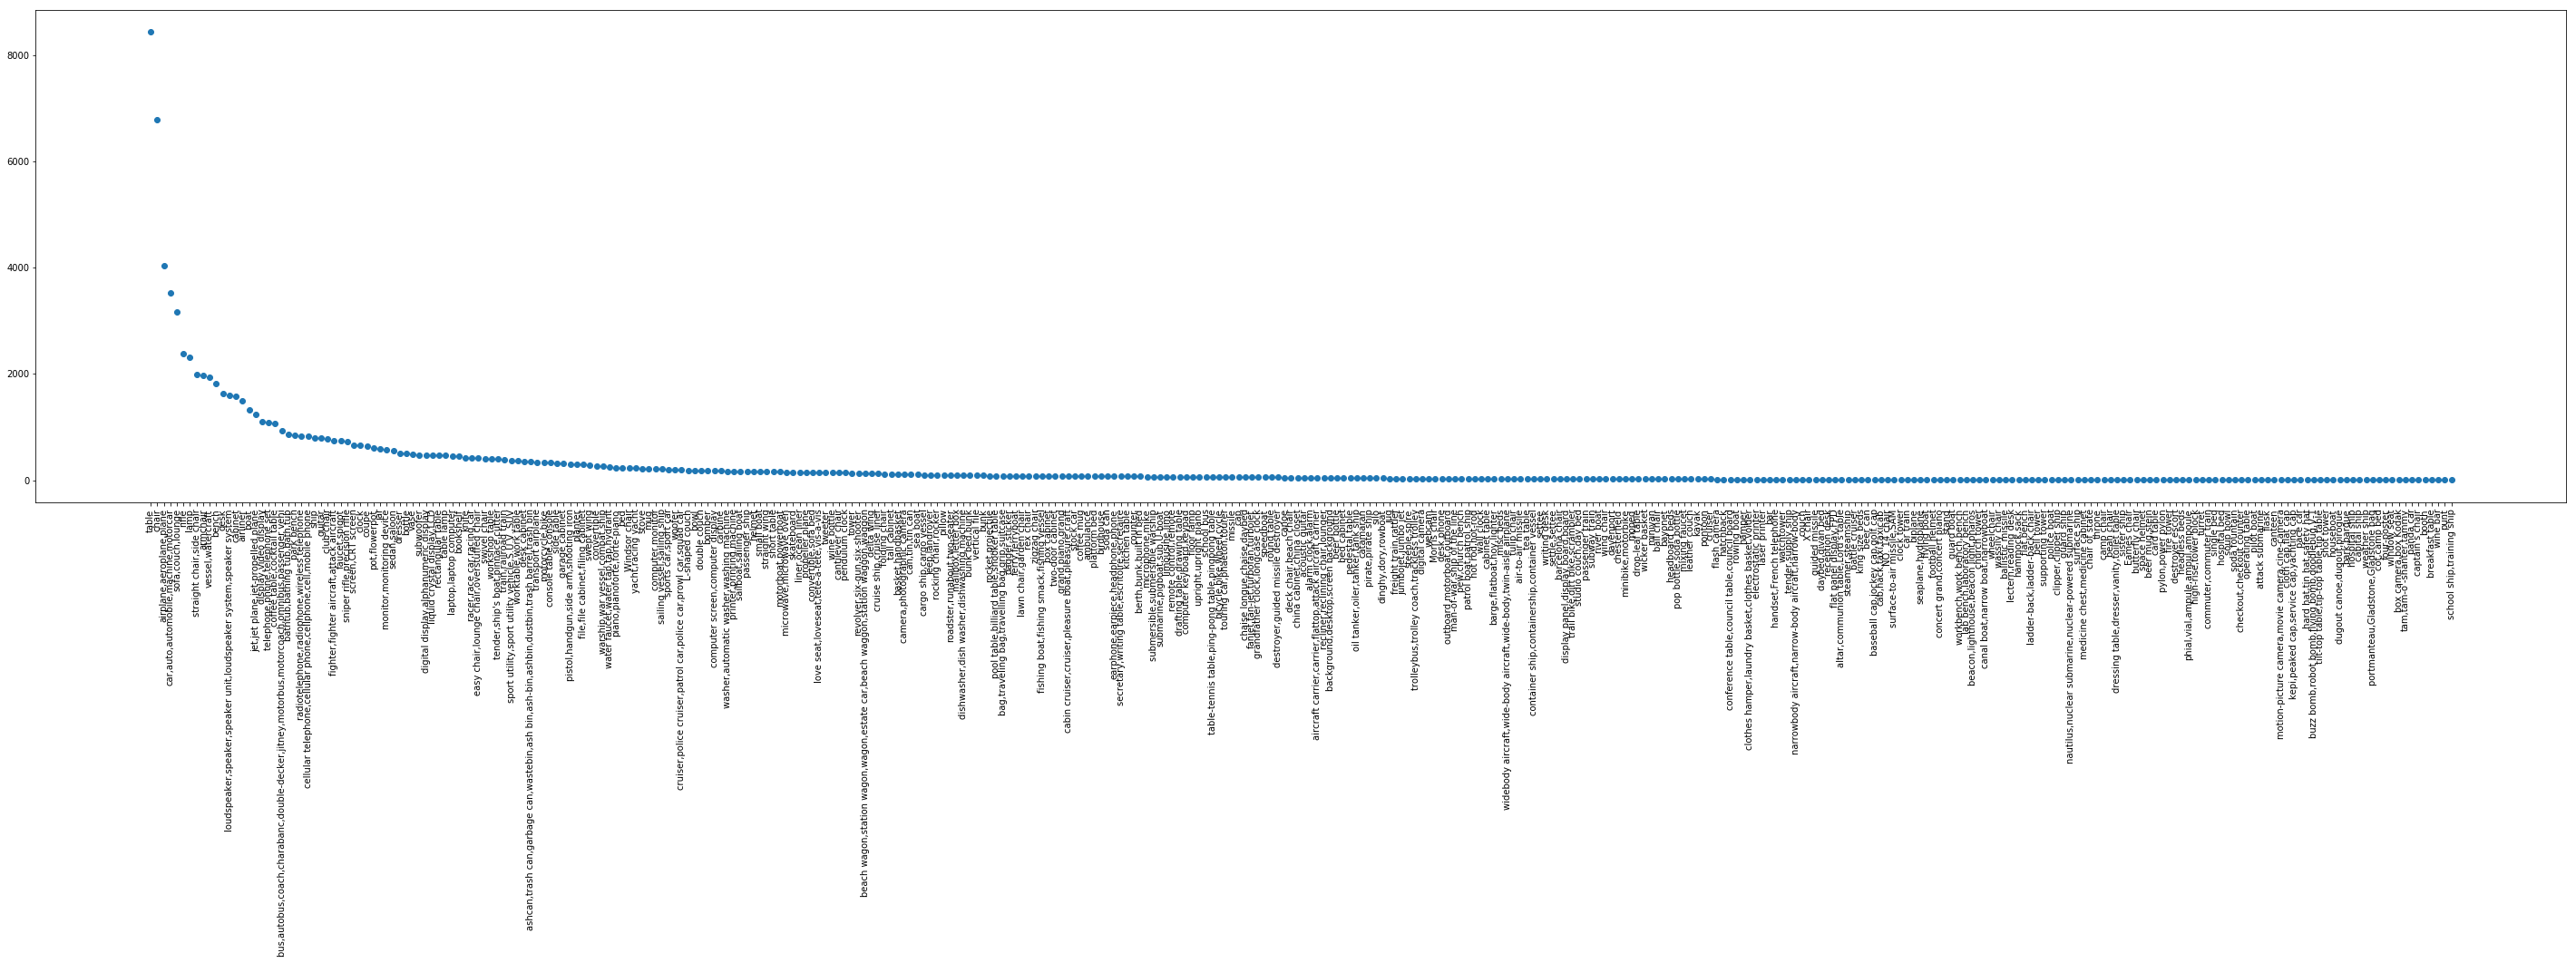

In [74]:
import json
import matplotlib.pyplot as plt

taxonomy = json.loads((SHAPENET_DIR / 'taxonomy.json').read_text())

counts = {
    d["name"]: d["numInstances"]
    for d in taxonomy
}
counts

xs, ys = list(zip(*tuple(sorted(counts.items(), key=lambda x: -x[1]))))

plt.figure(figsize=(50, 10))
plt.plot(xs, ys, linestyle='None', marker='o')
plt.xticks(rotation=90)
print(min(ys))

In [75]:
counter = {}
for synset in SHAPENET_DIR.glob('*'):
    if synset.is_dir():
        counter[synset.name] = len(list(synset.glob('*')))
counter

{'02747177': 343,
 '02801938': 113,
 '04468005': 389,
 '04090263': 2373,
 '04554684': 169,
 '02691156': 4045,
 '03691459': 1618,
 '02942699': 113,
 '02843684': 73,
 '02876657': 498,
 '03624134': 424,
 '03211117': 1095,
 '02871439': 452,
 '02828884': 1816,
 '04099429': 85,
 '03928116': 239,
 '03938244': 96,
 '04225987': 152,
 '03642806': 460,
 '04379243': 8509,
 '04460130': 133,
 '04330267': 218,
 '03207941': 93,
 '04074963': 66,
 '03797390': 214,
 '03636649': 2318,
 '03337140': 298,
 '03761084': 152,
 '04401088': 1091,
 '03001627': 6778,
 '02924116': 939,
 '03325088': 744,
 '03948459': 307,
 '04004475': 166,
 '02992529': 831,
 '03790512': 337,
 '02954340': 56,
 '02958343': 7496,
 '02818832': 233,
 '03085013': 65,
 '03046257': 651,
 '02773838': 83,
 '03467517': 797,
 '03261776': 73,
 '03513137': 162,
 '02808440': 856,
 '02933112': 1572,
 '03710193': 94,
 '02880940': 186,
 '03759954': 67,
 '04256520': 3173,
 '04530566': 1939,
 '03593526': 596,
 '02946921': 108,
 '03991062': 602}

In [76]:
list(zip(xs, ys))[:20]

[('table', 8436),
 ('chair', 6778),
 ('airplane,aeroplane,plane', 4045),
 ('car,auto,automobile,machine,motorcar', 3533),
 ('sofa,couch,lounge', 3173),
 ('rifle', 2373),
 ('lamp', 2318),
 ('straight chair,side chair', 1995),
 ('armchair', 1974),
 ('vessel,watercraft', 1939),
 ('bench', 1813),
 ('desk', 1633),
 ('loudspeaker,speaker,speaker unit,loudspeaker system,speaker system', 1597),
 ('cabinet', 1571),
 ('airliner', 1490),
 ('boat', 1316),
 ('jet,jet plane,jet-propelled plane', 1235),
 ('display,video display', 1093),
 ('telephone,phone,telephone set', 1089),
 ('coffee table,cocktail table', 1068)]

In [77]:
render_paths = list(SHAPENET_DIR.rglob("*.png"))
len(render_paths)

1082676

In [78]:
render_paths = seq(render_paths).filter(lambda x: 'texture' not in x.name).to_list()
len(render_paths), render_paths[:10]

(1069620,
 [PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/13.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/09.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/20.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/08.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/11.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/02.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/19.png'),
  PosixPath('/datasets/users/kkania/shapenet/ShapeNetCore.v2/04090263/d77515679ddbcd9c8064e4301e947b0d/rendering/10.png'),
  Posi

In [79]:
len(json.loads((SHAPENET_DIR / "taxonomy.json").read_text()))

354

In [80]:
description

dict_values([{'id': '04256520', 'name': 'sofa,couch,lounge'}, {'id': '02691156', 'name': 'airplane,aeroplane,plane'}, {'id': '03636649', 'name': 'lamp'}, {'id': '04401088', 'name': 'telephone,phone,telephone set'}, {'id': '04530566', 'name': 'vessel,watercraft'}, {'id': '03691459', 'name': 'loudspeaker,speaker,speaker unit,loudspeaker system,speaker system'}, {'id': '03001627', 'name': 'chair'}, {'id': '02933112', 'name': 'cabinet'}, {'id': '04379243', 'name': 'table'}, {'id': '03211117', 'name': 'display,video display'}, {'id': '02958343', 'name': 'car,auto,automobile,machine,motorcar'}, {'id': '02828884', 'name': 'bench'}, {'id': '04090263', 'name': 'rifle'}])

In [81]:
description = json.load(open('../experiments/dataset/shapenet.json')).values()
names = seq(description).map(lambda x: x["id"]).to_set()

In [82]:
render_paths_filtered = seq(render_paths).filter(lambda x: x.parent.parent.parent.name in names).to_list()
len(render_paths_filtered)

1068836

In [83]:
original_names = seq(render_paths_filtered).map(lambda x: x.parent.parent.parent.name).to_set()

In [84]:
list_of_dict_paths = seq(render_paths_filtered).map(lambda x: (x.parent.parent.name, x)).to_list()
dict_paths = defaultdict(list)
for item in list_of_dict_paths:
    dict_paths[item[0]].append(item[1])
dict_paths = dict(dict_paths)

In [85]:
a_key_widgets = widgets.IntSlider(
    min=0,
    max=len(dict_paths) - 1,
    value=0,
    description="Key:"
)

keys = list(dict_paths.keys())

@widgets.interact(a_key=a_key_widgets)
def display_renderings(a_key):
    paths = dict_paths[keys[a_key]]
    sorted_paths = seq(paths).sorted(lambda x: int(x.with_suffix("").name)).to_list()
    fig, axes = plt.subplots(4, 6, figsize=(6 * 6, 4 * 6))
    axes = np.asarray(axes).flatten()
    for i, render_path in enumerate(sorted_paths):
        img = imageio.imread(render_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        
    fig.tight_layout()

interactive(children=(IntSlider(value=0, description='Key:', max=43517), Output()), _dom_classes=('widget-inte…

In [86]:
len(keys) * 24

1044432